"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# IMDB FINAL PROJECT
Alexis Cherry

# 1. Business Understanding 

### 1.1 
The goal of this project is to predict movie success given a movie's specific attributes using Regression, Classification, and Clustering models/algorithms. 

# 2. Data Understanding

For this project, we will be using popular data from IMDB frequently used for data analytics projects. The dataset can be obtained at : https://data.world/popculture/imdb-5000-movie-dataset 

### 2.1 Import packages and read the data

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from graphviz import Source
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus

# grid search
from sklearn.model_selection import GridSearchCV

# Support Vector Machine 
from sklearn import svm
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

from yellowbrick.regressor import ResidualsPlot

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.externals.six import StringIO

#!pip install pydotplus
import pydotplus

In [84]:
# check what version of sklearn is running in your machine.
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# run the latest sklearn

The scikit-learn version is 0.21.2.


In [85]:
df = pd.read_csv("movie_metadata.csv", encoding = 'utf-8')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [86]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [87]:
df.columns = df.columns.str.replace('_', '')
df.columns = df.columns.str.lower()
df.head()

,color,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,movieimdblink,numuserforreviews,language,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### 2.2 Handle duplicates 

In [88]:
#count number of duplicates
len(df[df.duplicated()])

45

In [89]:
# number of entries including duplicates
len(df)

5043

In [90]:
df.drop_duplicates(keep=False, inplace=True)

In [91]:
# number of entries after removal of duplicates
len(df)

4953

#### Display data types

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 5042
Data columns (total 28 columns):
color                     4934 non-null object
directorname              4851 non-null object
numcriticforreviews       4905 non-null float64
duration                  4938 non-null float64
directorfacebooklikes     4851 non-null float64
actor3facebooklikes       4930 non-null float64
actor2name                4940 non-null object
actor1facebooklikes       4946 non-null float64
gross                     4089 non-null float64
genres                    4953 non-null object
actor1name                4946 non-null object
movietitle                4953 non-null object
numvotedusers             4953 non-null int64
casttotalfacebooklikes    4953 non-null int64
actor3name                4930 non-null object
facenumberinposter        4940 non-null float64
plotkeywords              4802 non-null object
movieimdblink             4953 non-null object
numuserforreviews         4932 non-null fl

### 2.3 Data quality issues

I want to display all of the columns to search for any obvious data quality issues. 

In [93]:
pd.set_option('display.max_columns', None)
df.head()

,color,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,movieimdblink,numuserforreviews,language,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


There are some columns that are not useful for our analysis and some columns that should be added to enhance our analysis

In [94]:
# drop movie_imdb_link
df = df.drop('movieimdblink', axis=1)
df.head()

,color,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,language,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [95]:
df['language'].value_counts()

English       4620
French          73
Spanish         40
Hindi           28
Mandarin        22
German          19
Japanese        16
Russian         11
Cantonese       11
Italian         11
Korean           8
Portuguese       8
Arabic           5
Hebrew           5
Swedish          5
Danish           5
Norwegian        4
Dutch            4
Persian          4
Polish           4
Chinese          3
Thai             3
Aboriginal       2
Zulu             2
Icelandic        2
Dari             2
Indonesian       2
None             2
Romanian         2
Swahili          1
Urdu             1
Panjabi          1
Bosnian          1
Maya             1
Kazakh           1
Dzongkha         1
Greek            1
Slovenian        1
Mongolian        1
Kannada          1
Telugu           1
Aramaic          1
Czech            1
Filipino         1
Tamil            1
Vietnamese       1
Hungarian        1
Name: language, dtype: int64

Since English is the most prevalent type of language included in this data, I am going to assume that the language has no influential impact on a movie's success. We will drop this column as well.

In [96]:
df = df.drop('language', axis=1)
df.head()

,color,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [97]:
df['color'].value_counts()

Color               4729
 Black and White     205
Name: color, dtype: int64

Similar results are present for color, thus we will not include this in the anaylsis either. 

In [98]:
df = df.drop('color', axis=1)
df.head()

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [99]:
df['country'].value_counts()

USA                     3739
UK                       438
France                   154
Canada                   122
Germany                   95
Australia                 55
India                     34
Spain                     33
China                     26
Italy                     23
Japan                     21
Hong Kong                 17
Mexico                    17
New Zealand               15
South Korea               14
Ireland                   12
Denmark                   11
Russia                    11
Brazil                     8
Norway                     8
South Africa               8
Sweden                     6
Thailand                   5
Poland                     5
Netherlands                5
Israel                     4
Argentina                  4
Romania                    4
Iran                       4
Belgium                    4
                        ... 
Hungary                    2
Greece                     2
Peru                       1
Finland       

Since USA, UK, and France have significant data and the others countries have little, we will group them together so data will show: USA, UK, France, and Other.

In [100]:
def group_countries(country):
    mapping = {
'Germany' : 'Other',         
'Canada' : 'Other',              
'Australia' : 'Other',           
'Spain' : 'Other',                
'Japan' : 'Other',                
'Hong Kong': 'Other',            
'Italy' : 'Other',                
'New Zealand' : 'Other',          
'China' : 'Other',                
'South Korea' : 'Other',           
'Denmark' : 'Other',               
'Ireland' : 'Other',               
'Mexico' : 'Other',                
'Brazil' : 'Other',                
'India' : 'Other',                 
'Iran' : 'Other',                  
'Norway' : 'Other',                
'Thailand' : 'Other',             
'Russia': 'Other',               
'Argentina' : 'Other',            
'South Africa': 'Other',          
'Netherlands' : 'Other',         
'Czech Republic'  : 'Other',      
'Romania' : 'Other',          
'Taiwan' : 'Other',             
'Hungary' : 'Other',          
'Greece': 'Other',          
'Aruba'   : 'Other',         
'West Germany'    : 'Other',      
'Official site'  : 'Other',       
'Finland'    : 'Other',       
'Israel' : 'Other',        
'Chile' : 'Other',          
'New Line'   : 'Other',        
'Colombia'  : 'Other',      
'Afghanistan'   : 'Other',    
'Belgium' : 'Other',             
'Iceland' : 'Other',             
'Poland': 'Other',             
'Georgia' : 'Other',            
'Peru' : 'Other',            
'Indonesia' : 'Other'
         }

    try:
        return mapping[country]
    except:
        return country

In [101]:
df['countrygroups'] = df['country'].apply(group_countries)

In [102]:
df.head()

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,countrygroups
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,USA
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,USA
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,UK
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,USA
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN


In [103]:
# create a new column called 'profit' using budget and gross columns
df['profit'] = df['gross'] - df['budget']
df.head()

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,countrygroups,profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,USA,523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,USA,9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,UK,-44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,USA,198130642.0
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,NaN


In [104]:
# create a new column 'return_on_investment' using profit and budget
df['returnoninvestment'] = (df['profit'] / df['budget']) * 100
df.head()

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,countrygroups,profit,returnoninvestment
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,USA,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,USA,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,UK,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,USA,198130642.0,79.252257
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,NaN,NaN


This column is presented as a **percentage**

# 3. Data Preparation 

We want to check for missing values in the data. 

In [105]:
df.isnull().sum()

directorname               102
numcriticforreviews         48
duration                    15
directorfacebooklikes      102
actor3facebooklikes         23
actor2name                  13
actor1facebooklikes          7
gross                      864
genres                       0
actor1name                   7
movietitle                   0
numvotedusers                0
casttotalfacebooklikes       0
actor3name                  23
facenumberinposter          13
plotkeywords               151
numuserforreviews           21
country                      5
contentrating              299
budget                     482
titleyear                  106
actor2facebooklikes         13
imdbscore                    0
aspectratio                325
moviefacebooklikes           0
countrygroups                5
profit                    1130
returnoninvestment        1130
dtype: int64

In [106]:
# drop all missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3692 entries, 0 to 5042
Data columns (total 28 columns):
directorname              3692 non-null object
numcriticforreviews       3692 non-null float64
duration                  3692 non-null float64
directorfacebooklikes     3692 non-null float64
actor3facebooklikes       3692 non-null float64
actor2name                3692 non-null object
actor1facebooklikes       3692 non-null float64
gross                     3692 non-null float64
genres                    3692 non-null object
actor1name                3692 non-null object
movietitle                3692 non-null object
numvotedusers             3692 non-null int64
casttotalfacebooklikes    3692 non-null int64
actor3name                3692 non-null object
facenumberinposter        3692 non-null float64
plotkeywords              3692 non-null object
numuserforreviews         3692 non-null float64
country                   3692 non-null object
contentrating             3692 non-null o

Now, there are only 3692 entries, compared to 4953. 

# 4. Business Intelligence

### 4.1 Basic Statistics

I'd like to obtain some basic information about the data to understand what relationships may be present

In [107]:
df.describe()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment
count,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3.692000e+03,3.692000e+03,3692.000000,3692.000000,3692.000000,3.692000e+03,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3.692000e+03,3692.000000
mean,166.633261,110.267606,812.029523,758.409805,7731.393824,5.231777e+07,1.052215e+05,11457.118906,1.374052,334.789816,4.620358e+07,2002.957205,1997.041983,6.465791,2.110339,9239.297941,6.114197e+06,540.234737
std,123.232155,22.704536,3084.416245,1842.123129,15593.782658,6.926686e+07,1.510622e+05,19100.254084,2.048480,410.862371,2.278447e+08,9.894886,4515.988836,1.050777,0.354654,21384.806287,2.316114e+08,13301.749801
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000,-1.221330e+10,-99.998200
25%,77.000000,96.000000,11.000000,194.000000,742.750000,8.101381e+06,1.943300e+04,1899.000000,0.000000,109.000000,1.000000e+07,1999.000000,380.000000,5.900000,1.850000,0.000000,-1.027070e+07,-51.730260
50%,138.000000,106.000000,62.000000,436.000000,1000.000000,2.998654e+07,5.397350e+04,4041.000000,1.000000,209.000000,2.500000e+07,2005.000000,682.500000,6.600000,2.350000,221.500000,1.555326e+06,10.124252
75%,223.000000,120.000000,234.250000,690.000000,13000.000000,6.688194e+07,1.283432e+05,16196.750000,2.000000,397.250000,5.000000e+07,2010.000000,975.000000,7.200000,2.350000,11000.000000,2.567130e+07,122.894383
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000,5.235058e+08,719348.553333


In [108]:
df['imdbscore'].describe()

count    3692.000000
mean        6.465791
std         1.050777
min         1.600000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdbscore, dtype: float64

### 4.2 Groupby

In [109]:
df.groupby('directorname')['profit'].sum().sort_values(ascending = False).head()

directorname
Steven Spielberg    2.486332e+09
George Lucas        1.386641e+09
James Cameron       1.199626e+09
Chris Columbus      9.417076e+08
Tim Burton          8.242755e+08
Name: profit, dtype: float64

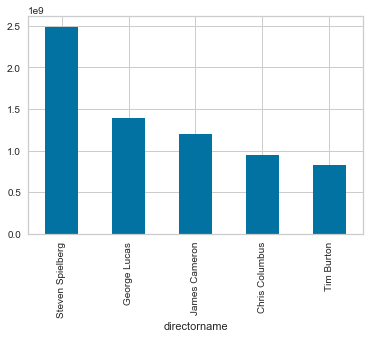

In [110]:
df.groupby('directorname')['profit'].sum().sort_values(ascending = False).head().plot(kind='bar');

Steven Spielberg had the highest sum of profit from all of his movies, does that translate to a high imdb score?

In [111]:
df.groupby('directorname')['imdbscore'].mean().sort_values(ascending = False).head()

directorname
Akira Kurosawa     8.7
Charles Chaplin    8.6
Tony Kaye          8.6
Ron Fricke         8.5
Majid Majidi       8.5
Name: imdbscore, dtype: float64

In [112]:
df.groupby('directorname')['imdbscore'].mean().sort_values(ascending = True).head()

directorname
Vondie Curtis-Hall    2.1
Alex Zamm             2.3
Roger Christian       2.4
Jason Friedberg       2.6
Aaron Seltzer         2.7
Name: imdbscore, dtype: float64

In [113]:
df['directorname'].value_counts()

Steven Spielberg             25
Clint Eastwood               19
Woody Allen                  19
Ridley Scott                 17
Martin Scorsese              16
Steven Soderbergh            16
Tim Burton                   16
Renny Harlin                 15
Spike Lee                    15
Robert Zemeckis              13
Ron Howard                   13
Barry Levinson               13
Robert Rodriguez             13
Michael Bay                  13
Oliver Stone                 13
Joel Schumacher              12
Tony Scott                   12
Sam Raimi                    12
Peter Jackson                11
Richard Linklater            11
John Carpenter               11
Rob Reiner                   11
Chris Columbus               11
David Fincher                10
John McTiernan               10
Kevin Smith                  10
Paul W.S. Anderson           10
Brian De Palma               10
Wes Craven                   10
Shawn Levy                   10
                             ..
Wayne Be

Spielberg also has the most movies in this dataset (most likely the reason for the high profits)...still does he have the highest imdb score?

In [114]:
df.groupby('directorname')['imdbscore'].max().sort_values(ascending = False).head()

directorname
Frank Darabont          9.3
Francis Ford Coppola    9.2
Christopher Nolan       9.0
Peter Jackson           8.9
Steven Spielberg        8.9
Name: imdbscore, dtype: float64

Here, we see that no, Spielberg does not have the highest imdb score, but he is close. These put together could possibly suffice to say that Steven Spielberg movies often have higher imdb scores. 

In [115]:
df.groupby('directorname')['budget'].mean().sort_values(ascending = False).head()

directorname
Joon-ho Bong       6.127350e+09
Lajos Koltai       2.500000e+09
Katsuhiro Ôtomo    1.613760e+09
Chan-wook Park     1.405000e+09
Takao Okawara      1.000000e+09
Name: budget, dtype: float64

In [116]:
df.groupby('numuserforreviews')['imdbscore'].max().sort_values(ascending = False).head()

numuserforreviews
4144.0    9.3
2238.0    9.2
650.0     9.0
4667.0    9.0
780.0     8.9
Name: imdbscore, dtype: float64

In [117]:
df.groupby('numuserforreviews')['imdbscore'].min().sort_values(ascending = True).head()

numuserforreviews
233.0    1.6
129.0    1.9
359.0    1.9
46.0     2.0
308.0    2.1
Name: imdbscore, dtype: float64

In [118]:
# top twenty movies based on profit
top = df.sort_values('profit', ascending = False).head(20)
top

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,countrygroups,profit,returnoninvestment
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,USA,523505847.0,220.888543
29,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,1290.0,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000,USA,502177271.0,334.784847
26,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,2528.0,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000,USA,458672302.0,229.336151
3024,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1.0,death star|empire|galactic war|princess|rebellion,1470.0,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000,USA,449935665.0,4090.324227
3080,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,2811,Peter Coyote,0.0,bicyclist|boy|doll|star wars reference|voice i...,515.0,USA,PG,10500000.0,1982.0,725.0,7.9,1.85,34000,USA,424449459.0,4042.375800
509,Roger Allers,186.0,73.0,28.0,847.0,Nathan Lane,2000.0,422783777.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,6458,Niketa Calame,0.0,king|prince|scar|uncle|unnecessary guilt,656.0,USA,G,45000000.0,1994.0,886.0,8.5,1.66,17000,USA,377783777.0,839.519504
240,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,Ian McDiarmid,1.0,alien|character says i have a bad feeling abou...,3597.0,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000,USA,359544677.0,312.647545
66,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,4667.0,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000,USA,348316061.0,188.278952
439,Gary Ross,673.0,142.0,378.0,575.0,Josh Hutcherson,34000.0,407999255.0,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,49942,Anthony Reynolds,0.0,fight to the death|game|massacre|self survival...,1959.0,USA,PG-13,78000000.0,2012.0,14000.0,7.3,2.35,140000,USA,329999255.0,423.075968
812,Tim Miller,579.0,108.0,84.0,361.0,Ed Skrein,16000.0,363024263.0,Action|Adventure|Comedy|Romance|Sci-Fi,Ryan Reynolds,Deadpool,479047,18239,Stefan Kapicic,0.0,based on comic book|breaking the fourth wall|m...,1058.0,USA,R,58000000.0,2016.0,805.0,8.1,2.35,117000,USA,305024263.0,525.903902


In [119]:
# top twenty movies based on return on investment
toproi = df.sort_values('returnoninvestment', ascending = False).head(20)
toproi

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,countrygroups,profit,returnoninvestment
4793,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,Micah Sloat,Paranormal Activity,184824,330,Amber Armstrong,0.0,dark force|entity|evil force|found footage|par...,1189.0,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000,USA,107902283.0,719348.553333
4799,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,Greg Ayres,Tarnation,5709,78,Renee Leblanc,3.0,answering machine|home movie|lithium|schizophr...,114.0,USA,Unrated,218.0,2003.0,20.0,7.2,1.37,754,USA,591796.0,271466.055046
4707,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,Heather Donahue,The Blair Witch Project,186786,399,Michael C. Williams,0.0,found footage|looking at the camera|lost in th...,3400.0,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,USA,140470114.0,234116.856667
4984,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,Shari Albert,The Brothers McMullen,6375,388,Maxine Bahns,0.0,abusive father|critically acclaimed|loss of fa...,36.0,USA,R,25000.0,1995.0,111.0,6.6,1.85,265,USA,10221600.0,40886.400000
4936,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96411,1094,Marilyn Burns,0.0,cannibal|chainsaw|hitchhiker|independent film|...,826.0,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,USA,30775468.0,36842.728535
3278,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96410,1094,Marilyn Burns,0.0,cannibal|chainsaw|hitchhiker|independent film|...,826.0,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,USA,30775468.0,36842.728535
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,130.0,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,USA,2033920.0,29056.000000
4956,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,Pfeifer Brown,The Gallows,13521,276,Reese Mishler,0.0,breaking and entering|gallows|hanging|high sch...,150.0,USA,R,100000.0,2015.0,40.0,4.2,1.85,0,USA,22657819.0,22657.819000
4977,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,Chemeeka Walker,Super Size Me,85028,0,Amelia Giancarlo,2.0,experiment|fast food|food industry|meal|overea...,404.0,USA,PG,65000.0,2004.0,0.0,7.3,1.78,0,USA,11464368.0,17637.489231
4821,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,Jamie Lee Curtis,Halloween,157863,4400,P.J. Soles,0.0,halloween|masked killer|michael myers|slasher|...,1191.0,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,USA,46700000.0,15566.666667


### 4.3 Filtering

Based on the average imbd score, I am going to use a filter determining movies with "good" and "bad" scores. I am using 7 (above the average) and above to qualify as a "good" score and 5 (below the average) and below to qualify as a "bad" score. Using these, I will obsereve characteristics of those movies that received good scores and those that received bad scores to come to some sort of conclusion.

In [120]:
goodscore = df[(df['imdbscore'] >= 7)]
goodscore.sort_values('imdbscore', ascending=False).head()

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,countrygroups,profit,returnoninvestment
1937,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,13495,Bob Gunton,0.0,escape from prison|first person narration|pris...,4144.0,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000,USA,3341469.0,13.365876
3466,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,28122,Robert Duvall,1.0,crime family|mafia|organized crime|patriarch|r...,2238.0,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000,USA,128821952.0,2147.032533
66,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,4667.0,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000,USA,348316061.0,188.278952
2837,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,39960,Robert Duvall,1.0,1950s|corrupt politician|lake tahoe nevada|mel...,650.0,USA,R,13000000.0,1974.0,14000.0,9.0,1.85,14000,USA,44300000.0,340.769231
1874,Steven Spielberg,174.0,185.0,14000.0,212.0,Embeth Davidtz,14000.0,96067179.0,Biography|Drama|History,Liam Neeson,Schindler's List,865020,15233,Caroline Goodall,0.0,german|german soldier|jew|jewish|nazi,1273.0,USA,R,22000000.0,1993.0,795.0,8.9,1.85,41000,USA,74067179.0,336.668995


In [121]:
badscore = df[(df['imdbscore'] <= 5)]
badscore.sort_values('imdbscore', ascending=True).head()

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,countrygroups,profit,returnoninvestment
2834,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,Usher Raymond,Justin Bieber: Never Say Never,74351,714,Boys II Men,1.0,boyhood friend|manager|plasma tv|prodigy|star,233.0,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000,USA,60000942.0,461.545708
2295,Bob Clark,32.0,88.0,84.0,177.0,Vanessa Angel,650.0,9109322.0,Comedy|Family|Sci-Fi,Scott Baio,Superbabies: Baby Geniuses 2,25371,1343,Peter Wingfield,3.0,computer|good versus evil|mind control|science...,129.0,Germany,PG,20000000.0,2004.0,384.0,1.9,2.35,0,Other,-10890678.0,-54.453390
2268,Jason Friedberg,111.0,88.0,82.0,329.0,Tony Cox,869.0,14174654.0,Comedy,Carmen Electra,Disaster Movie,74945,2857,Ike Barinholtz,0.0,disaster|glass|mousetrap|natural disaster|scat...,359.0,USA,PG-13,25000000.0,2008.0,624.0,1.9,1.85,0,USA,-10825346.0,-43.301384
3505,Don Michael Paul,25.0,93.0,70.0,442.0,Faizon Love,692.0,5694308.0,Comedy|Sport,Jeffrey Jones,Who's Your Caddy?,13815,3128,Lil' Wayne,0.0,2000s|golf caddy|golf course|golfer|question m...,46.0,USA,PG-13,7000000.0,2007.0,585.0,2.0,1.85,446,USA,-1305692.0,-18.652743
2983,Robert Iscove,60.0,90.0,7.0,251.0,Kelly Clarkson,525.0,4922166.0,Comedy|Musical|Romance,Anika Noni Rose,From Justin to Kelly,23606,1445,Brian Dietzen,2.0,bar|florida|love|spring break|waitress,304.0,USA,PG,12000000.0,2003.0,281.0,2.1,1.85,0,USA,-7077834.0,-58.981950


#### Key observations and differences: 
  - movies with good (and highest) scores had:
      - higher number of critic reviews
      - typically longer duration in comparison 
      - higher gross earnings
      - Crime and/or Drama in its genre
      - surprisingly, content rating for mature audiences 
      - an older title year
      - higher number of facebook likes
      - higher profit, and ROI
      
      
      
  - movies with bad (lowest) scores had: 
      - shorter duration
      - lower gross earnings
      - Comedy in its genre
      - content rating for younger audiences
      - more recent title year
      - low or negative profit and ROI

# 5. Correlation Analysis

We will look to see if there are any relationships between the data using correlation analysis

In [122]:
df.corr()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment
numcriticforreviews,1.000000,0.226594,0.176399,0.237824,0.165488,0.457503,0.590806,0.231149,-0.036506,0.561609,0.103178,0.419703,0.249155,0.351963,0.179348,0.701902,0.035323,0.032425
duration,0.226594,1.000000,0.180159,0.115576,0.082187,0.239431,0.338307,0.115277,0.028173,0.352589,0.066755,-0.133228,0.124339,0.368574,0.153604,0.210629,0.005937,-0.033609
directorfacebooklikes,0.176399,0.180159,1.000000,0.123959,0.091364,0.141238,0.306027,0.121685,-0.046986,0.220736,0.018065,-0.046866,0.119738,0.194003,0.036812,0.163384,0.024468,-0.006493
actor3facebooklikes,0.237824,0.115576,0.123959,1.000000,0.252598,0.261502,0.247032,0.481302,0.103548,0.195471,0.036412,0.115374,0.546794,0.062828,0.049569,0.247818,0.042386,-0.012767
actor1facebooklikes,0.165488,0.082187,0.091364,0.252598,1.000000,0.141269,0.176536,0.947370,0.054290,0.120979,0.015672,0.095633,0.389703,0.092356,0.056687,0.127374,0.026831,-0.015971
gross,0.457503,0.239431,0.141238,0.261502,0.141269,1.000000,0.620502,0.220206,-0.036550,0.546812,0.097176,0.051208,0.234851,0.216466,0.067912,0.350129,0.203470,0.018350
numvotedusers,0.590806,0.338307,0.306027,0.247032,0.176536,0.620502,1.000000,0.238550,-0.039256,0.779564,0.064917,0.023051,0.233336,0.482830,0.089568,0.511943,0.121709,0.009815
casttotalfacebooklikes,0.231149,0.115277,0.121685,0.481302,0.947370,0.220206,0.238550,1.000000,0.075940,0.173874,0.026691,0.126061,0.637705,0.104079,0.069983,0.194385,0.039599,-0.019125
facenumberinposter,-0.036506,0.028173,-0.046986,0.103548,0.054290,-0.036550,-0.039256,0.075940,1.000000,-0.083882,-0.022481,0.068905,0.067477,-0.068366,0.019736,0.010845,0.011185,-0.013402
numuserforreviews,0.561609,0.352589,0.220736,0.195471,0.120979,0.546812,0.779564,0.173874,-0.083882,1.000000,0.070221,0.020420,0.182415,0.325159,0.098354,0.366725,0.094453,0.067896


In [123]:
corr = pd.DataFrame(df.corr()['imdbscore'].drop('imdbscore'))
corr.sort_values(['imdbscore'], ascending = False)

,imdbscore
numvotedusers,0.482830
duration,0.368574
numcriticforreviews,0.351963
numuserforreviews,0.325159
moviefacebooklikes,0.287071
gross,0.216466
directorfacebooklikes,0.194003
casttotalfacebooklikes,0.104079
actor2facebooklikes,0.098232
actor1facebooklikes,0.092356


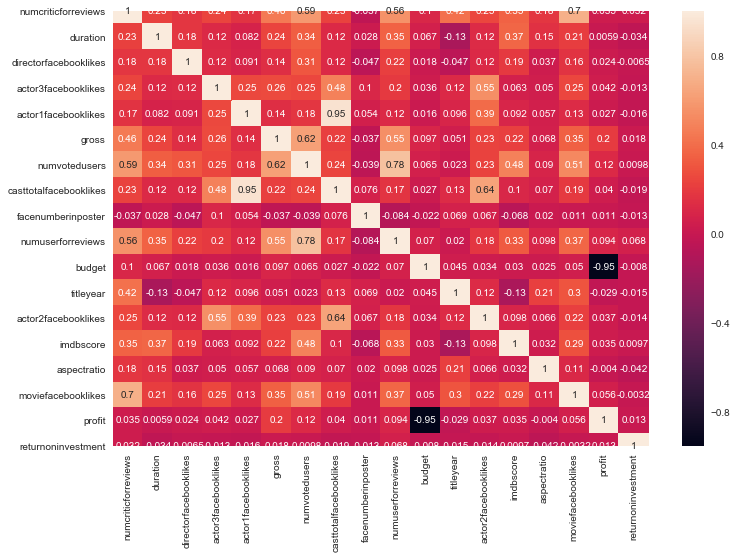

In [124]:
# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

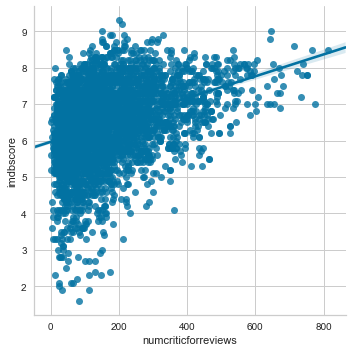

In [125]:
sns.lmplot('numcriticforreviews', 'imdbscore', df);

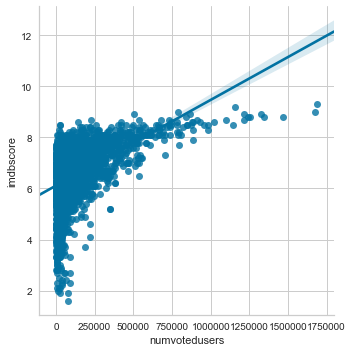

In [126]:
sns.lmplot('numvotedusers', 'imdbscore', df);

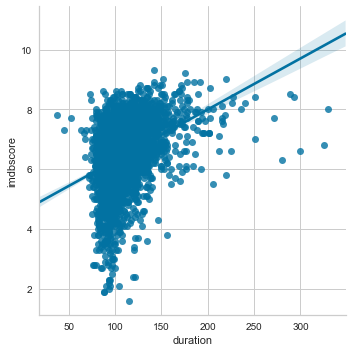

In [127]:
sns.lmplot('duration', 'imdbscore', df);

### Correlations between variables and imdb score
Strong positive correlations: 
   - number of critic reviews
   - duration (the longer the film, the more likely it will receive a high imdb score)
   - number of voted users
   - number of user reviews
   - facebook likes
   - gross earnings

Weak postive correlations: 
   - facebook likes for directors
   - actor facebook likes
   - budget
   - profit

Negative correlations: 
   - number of faces on the movie poster (the less faces on the poster, the higher the score)
   - year of title (movies released more recently had lower scores)

### Correlations between key variables
Strong positive correlations:
   - movie facebook likes and number of critic reviews (more critic reviews = more likes)
   - duration and number of critic/user reviews (longer movie = more votes)
   - duration and number of voted users (longer movie = more votes)
   - title year and number of critic reviews (recent movies have more reviews than older movies; my conclusion is that there is more knowledge of movies, higher expectations, and more unique attributes to comment on such as better technology/animations)
   - gross earnings and number of critic reviews (higher gross earnings received more reviews)
  
### Strong negative correlations:
   - profit and budget - the higher the budget, the less profit the movie saw

# 6. Model Building

Now that we have information on significant variables, we can use those variables to become the base of our model building. I will use duration, numvotedusers, and numcriticforreviews to develop three regression models. 

# 7. Regression 

### Single variable regression

In [128]:
# first model 
#assigning columns to X and Y variables
X = df['duration']
y = df['imdbscore']

In [129]:
# We create the model and call it lr.
model1 = lm.LinearRegression()
# We train the model on our training dataset.
model1.fit(X[:,np.newaxis], y)    ## X needs to be 2d for LinearRegression so add [:,np.newaxis]
# Now, we predict points with our trained model.
model1_y = model1.predict(X[:,np.newaxis])

In [130]:
# The coefficients
print('Coefficients: ', model1.coef_)
# y-intercept
print("y-intercept ", model1.intercept_)

Coefficients:  [0.0170578]
y-intercept  4.584868281337646


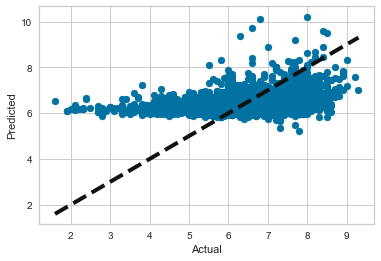

In [131]:
# try to evaluate the performance of our model's prediction using visualization

plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [132]:
# Let's build 2nd model
X = df['numvotedusers']
y = df['imdbscore'] 
model2 = lm.LinearRegression()
model2.fit(X[:,np.newaxis], y)
model2_y = model2.predict(X[:,np.newaxis])
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [3.35852598e-06]
y-intercept  6.112401766952436


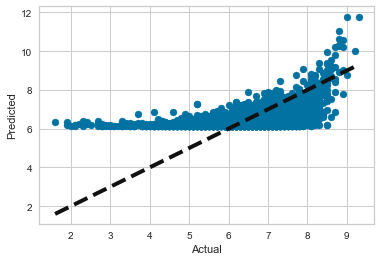

In [133]:
# try to evaluate the performance of our model's prediction using visualization

plt.subplots()
plt.scatter(y, model2_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [134]:
# Let's build 3rd model
X = df['numcriticforreviews']
y = df['imdbscore'] 
model3 = lm.LinearRegression()
model3.fit(X[:,np.newaxis], y)
model3_y = model2.predict(X[:,np.newaxis])
print('Coefficients: ', model3.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [0.00300112]
y-intercept  6.112401766952436


In [135]:
print("%.10f" % model3.coef_)

0.0030011201


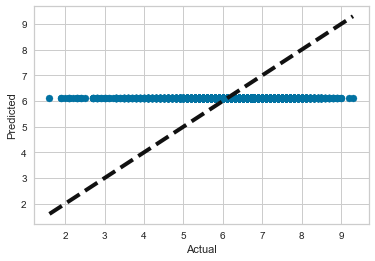

In [136]:
# try to evaluate the performance of our model's prediction using visualization

plt.subplots()
plt.scatter(y, model3_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

These show that a single variable regression does not really work here. 

#### Model Evaluation

In [137]:
# evaluate your model (1st)
print("mean square error: ", mean_squared_error(y, model1_y))
print(explained_variance_score(y, model1_y))

mean square error:  0.9538799870472101
0.1358471201699616


In [138]:
# evaluate your model (2nd)
print("mean square error: ", mean_squared_error(y, model2_y))
print(explained_variance_score(y, model2_y))

mean square error:  0.8465018070686294
0.2331247281703548


In [139]:
# evaluate your model (3rd)
print("mean square error: ", mean_squared_error(y, model3_y))
print(explained_variance_score(y, model3_y))

mean square error:  1.2280152162521154
0.0002771062353894571


The second model is the best because its SSE is smallest. 

#### Residual plot

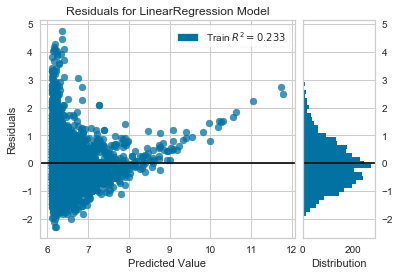

In [140]:
from yellowbrick.regressor import ResidualsPlot

X = df['numvotedusers']
y = df['imdbscore'] 

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X[:,np.newaxis], y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

This is not great, but R-square is still > 0.

#### Regression using Statsmodels

In [141]:
runs_reg_model2 = ols("imdbscore~numvotedusers",df)
runs_reg2 = runs_reg_model2.fit()
print(runs_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:              imdbscore   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1122.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          5.64e-215
Time:                        23:31:58   Log-Likelihood:                -4931.1
No. Observations:                3692   AIC:                             9866.
Df Residuals:                    3690   BIC:                             9879.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.1124      0.018    331.134

In [142]:
runs_reg2.mse_resid

0.8469606156361463

In [143]:
df.head()

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,numuserforreviews,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,countrygroups,profit,returnoninvestment
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,USA,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,USA,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,UK,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,USA,198130642.0,79.252257
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,USA,-190641321.0,-72.294775


In [144]:
# print the predicted y value (model 2)
print(model2_y)

[9.08874092 7.69500638 7.03891161 ... 6.35636174 6.28722984 6.12679305]


Using this regression, it is a little off on its prediction, but close. I expect that there are multicollinearity problems.

#### Plots (Statsmodels)

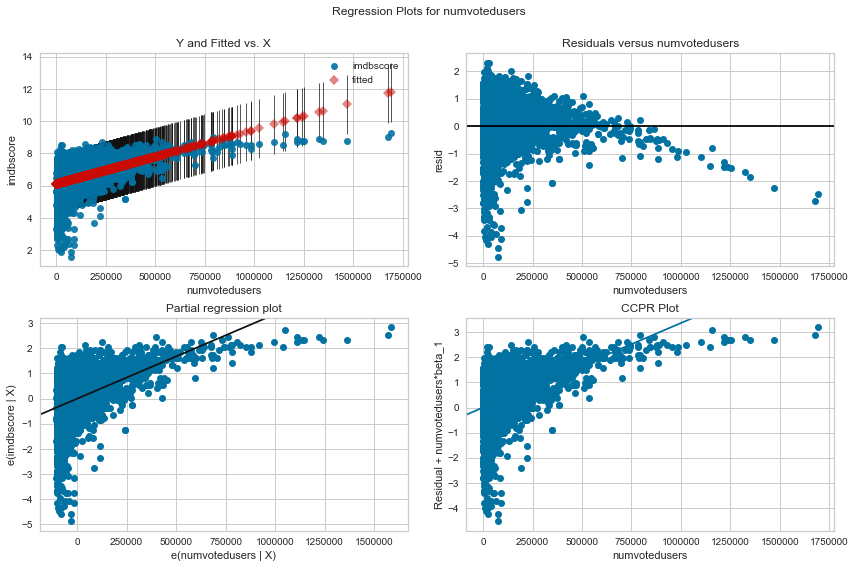

In [145]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(runs_reg2, "numvotedusers", fig=fig)

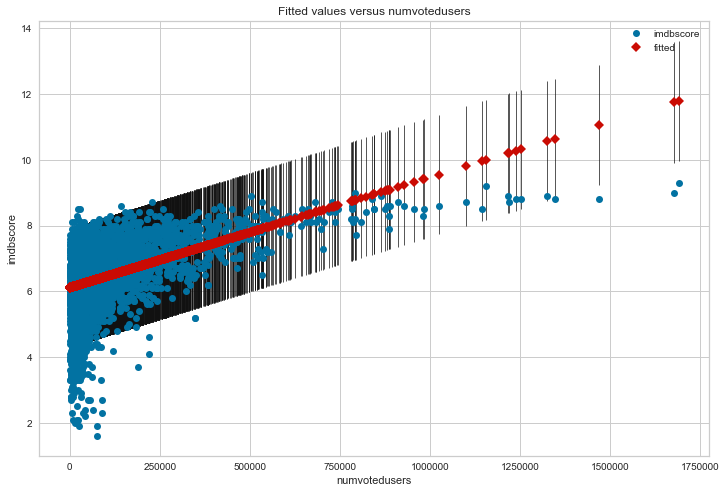

In [146]:
# fit plot

fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(runs_reg2, "numvotedusers", ax=ax)

### Multiple Regression

Using a multiple variable regression, I want to look at what I believe, from previous analysis, are the most influential factors. 

In [147]:
#assigning columns to X and Y variables
y = df['imdbscore'] 
X = df[['duration','numvotedusers','numcriticforreviews']]

In [148]:
X.head(2)

,duration,numvotedusers,numcriticforreviews
0,178.0,886204,723.0
1,169.0,471220,302.0


In [149]:
y.head(2)

0    7.9
1    7.1
Name: imdbscore, dtype: float64

#### Model Validation

In [150]:
# create two datasets from the original
# one data set is training data set
# the other is test data set 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [151]:
print(len(df), len(X), len(y))

3692 3692 3692


In [152]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

2584 2584 1108 1108


In [153]:
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)
#built
predict_y = model1.predict(X_test)

In [154]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('duration', '0.011'),
 ('numvotedusers', '0.000'),
 ('numcriticforreviews', '0.001')]

In [155]:
print("mean square error: ", mean_squared_error(y_test, predict_y))
print("variance or r-squared: ", explained_variance_score(y_test, predict_y))

mean square error:  0.7485165863483398
variance or r-squared:  0.2953786374057783


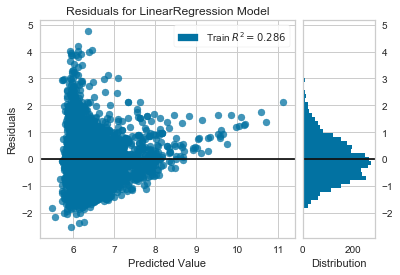

In [156]:
y = df['imdbscore'] 
X = df[['duration', 'numvotedusers', 'numcriticforreviews']]

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

This R-square is better than the last.

#### Model Evaluation

In [157]:
# Choose two variables and develop a multiple linear regression model.

y = df['imdbscore'] 
X = df[['numvotedusers', 'numcriticforreviews']]

model2 = lm.LinearRegression()
model2.fit(X, y)   
model2_y = model2.predict(X)

In [158]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('numvotedusers', '0.000'), ('numcriticforreviews', '0.001')]

In [159]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.8389567780023938
variance or r-squared:  0.23996003102241703


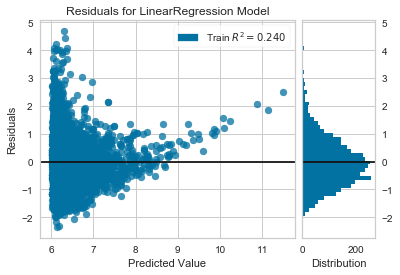

In [160]:
y = df['imdbscore'] 
X = df[['numvotedusers', 'numcriticforreviews']]

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

The first model with more variables is better. 

In [161]:
runs_reg_model = ols("imdbscore~duration+numvotedusers+numcriticforreviews",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              imdbscore   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     493.2
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.88e-269
Time:                        23:32:03   Log-Likelihood:                -4798.4
No. Observations:                3692   AIC:                             9605.
Df Residuals:                    3688   BIC:                             9630.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.9087    

In [162]:
runs_reg.mse_resid

0.7886380034947984

In [163]:
runs_reg.params

Intercept              4.908729
duration               0.010596
numvotedusers          0.000002
numcriticforreviews    0.000794
dtype: float64

In [166]:
# high values indicate multicollinearity
print(np.linalg.cond(runs_reg.model.exog))
print(np.linalg.cond(runs_reg2.model.exog))
print(np.linalg.cond(runs_reg.model.exog))
print(np.linalg.cond(runs_reg.model.exog))

949300.8305124816
224343.1004906885
949300.8305124816
949300.8305124816


As I suspected, there are multicollinearity issues. To fix multicollinearity, we can perform lasso regression techniques. 

In [167]:
# Fit the model below

model1 = lm.Lasso()             #higher alpha (penality parameter), fewer predictors
model1.fit(X, y)
model1_y = model1.predict(X)

In [168]:
model1

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [169]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [2.98613583e-06 7.72601321e-04]
y-intercept  6.0228441385989555


In [170]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('numvotedusers', '0.000'), ('numcriticforreviews', '0.001')]

In [171]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.8390579086632645
variance or r-squared:  0.23986841325810992


# 8. Classification

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3692 entries, 0 to 5042
Data columns (total 28 columns):
directorname              3692 non-null object
numcriticforreviews       3692 non-null float64
duration                  3692 non-null float64
directorfacebooklikes     3692 non-null float64
actor3facebooklikes       3692 non-null float64
actor2name                3692 non-null object
actor1facebooklikes       3692 non-null float64
gross                     3692 non-null float64
genres                    3692 non-null object
actor1name                3692 non-null object
movietitle                3692 non-null object
numvotedusers             3692 non-null int64
casttotalfacebooklikes    3692 non-null int64
actor3name                3692 non-null object
facenumberinposter        3692 non-null float64
plotkeywords              3692 non-null object
numuserforreviews         3692 non-null float64
country                   3692 non-null object
contentrating             3692 non-null o

In [173]:
df = df.select_dtypes(exclude=['object'])

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3692 entries, 0 to 5042
Data columns (total 18 columns):
numcriticforreviews       3692 non-null float64
duration                  3692 non-null float64
directorfacebooklikes     3692 non-null float64
actor3facebooklikes       3692 non-null float64
actor1facebooklikes       3692 non-null float64
gross                     3692 non-null float64
numvotedusers             3692 non-null int64
casttotalfacebooklikes    3692 non-null int64
facenumberinposter        3692 non-null float64
numuserforreviews         3692 non-null float64
budget                    3692 non-null float64
titleyear                 3692 non-null float64
actor2facebooklikes       3692 non-null float64
imdbscore                 3692 non-null float64
aspectratio               3692 non-null float64
moviefacebooklikes        3692 non-null int64
profit                    3692 non-null float64
returnoninvestment        3692 non-null float64
dtypes: float64(15), int64(3)
memor

In [175]:
bins = [.5, 4, 6, 8, 10]
labels = ["poor","ok", "good", "excellent"]
df['imdblabel'] = pd.cut(df['imdbscore'], bins=bins, labels=labels)

In [176]:
df.head()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment,imdblabel
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,good
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,good
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,good
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,excellent
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,good


In [177]:
y = df['imdblabel']
X = df.drop(['imdbscore', 'imdblabel'], axis=1)

print(y.shape, X.shape)

(3692,) (3692, 17)


### Decision Tree Building, Validation, and Evaluation

In [178]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier()

# Train a decision tree model
dt = dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [179]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.6660649819494585
--------------------------------------------------------
[[ 25  20   0   0]
 [ 20 548 136   8]
 [  1 149 161  17]
 [  0   9  10   4]]
--------------------------------------------------------
              precision    recall  f1-score   support

   excellent       0.54      0.56      0.55        45
        good       0.75      0.77      0.76       712
          ok       0.52      0.49      0.51       328
        poor       0.14      0.17      0.15        23

    accuracy                           0.67      1108
   macro avg       0.49      0.50      0.49      1108
weighted avg       0.67      0.67      0.67      1108

--------------------------------------------------------


67% overall accuracy. Not bad! However, "poor" accuracy is low. 

In [180]:
print(len(y_test))

1108


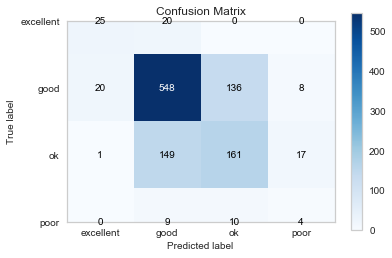

In [181]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

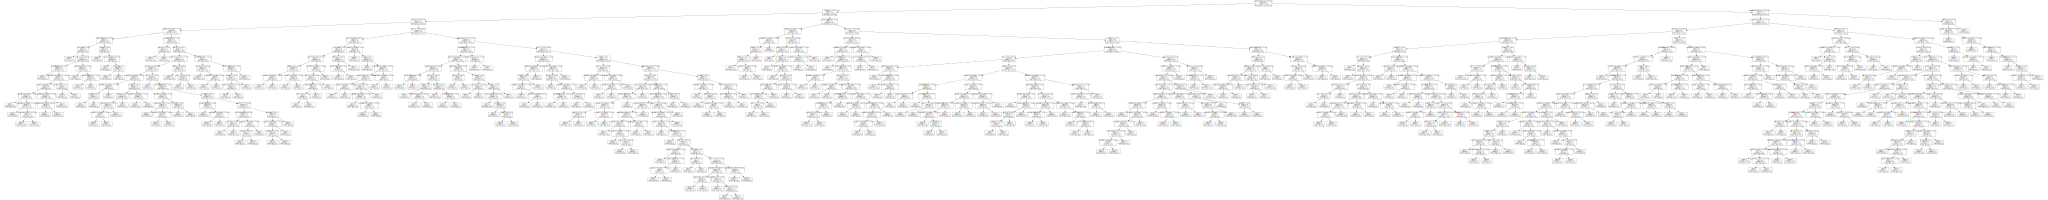

In [182]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

In [183]:
# make a simpler decision tree ... name the model "dt_simple" ()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier()
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt_simple = dt_simple.fit(X_train, y_train)

dt_simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [184]:
# Find out the performance of this model & interpret the results

print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")

0.7021660649819494
--------------------------------------------------------
[[ 22  23   0   0]
 [  6 639  67   0]
 [  0 211 117   0]
 [  0  11  12   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

   excellent       0.79      0.49      0.60        45
        good       0.72      0.90      0.80       712
          ok       0.60      0.36      0.45       328
        poor       0.00      0.00      0.00        23

    accuracy                           0.70      1108
   macro avg       0.53      0.44      0.46      1108
weighted avg       0.67      0.70      0.67      1108

--------------------------------------------------------


Better accuracy. Still not accurate on poor movies. 

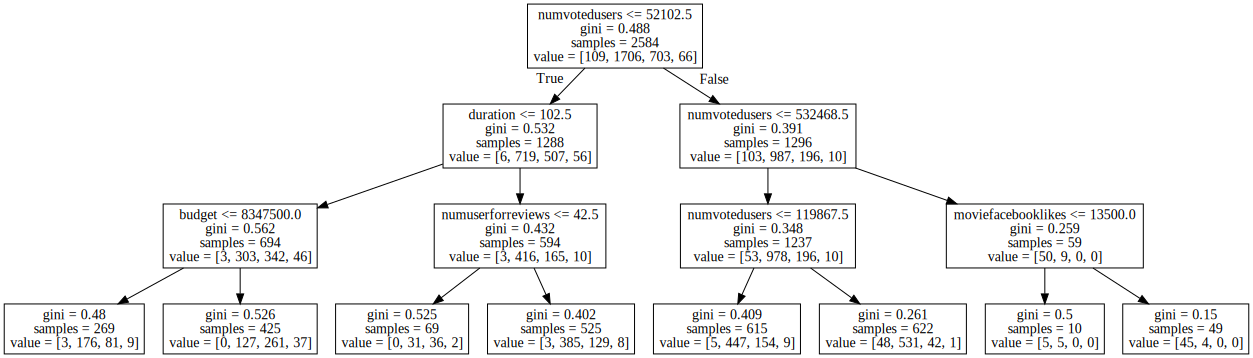

In [185]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt_simple, out_file=None, feature_names=X.columns))

#### Knn

In [186]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)

# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
knn = KNeighborsClassifier()

# Train a decision tree model
knn = knn.fit(X_train, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [187]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

0.5974729241877257
--------------------------------------------------------
[[  3  38   4   0]
 [ 13 590 109   0]
 [  1 258  69   0]
 [  0  16   7   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

   excellent       0.18      0.07      0.10        45
        good       0.65      0.83      0.73       712
          ok       0.37      0.21      0.27       328
        poor       0.00      0.00      0.00        23

    accuracy                           0.60      1108
   macro avg       0.30      0.28      0.27      1108
weighted avg       0.54      0.60      0.55      1108

--------------------------------------------------------


A lot more movies were classified correctly for good movies, but other misclassifications are much higher and bring the overall accuracy down. 

In [188]:
# evaluate the knn model using 10-fold cross-validation

scores = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.59299191 0.46756757 0.52162162 0.5        0.51219512 0.4498645
 0.41734417 0.4498645  0.52173913 0.62942779]
0.506261631896906


In [189]:
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5, iid=False)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [190]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_score_)
print(knn_gs.best_params_)
print(knn_gs.best_estimator_)

0.6567437774560109
{'n_neighbors': 24}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')


#### Logistic Regression

In [191]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
#Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

0.703971119133574
[[ 22  22   0   0]
 [  7 731  18   0]
 [  0 245  27   0]
 [  0  34   2   0]]
              precision    recall  f1-score   support

   excellent       0.76      0.50      0.60        44
        good       0.71      0.97      0.82       756
          ok       0.57      0.10      0.17       272
        poor       0.00      0.00      0.00        36

    accuracy                           0.70      1108
   macro avg       0.51      0.39      0.40      1108
weighted avg       0.65      0.70      0.62      1108



70% accuracy. 

In [193]:
# generate class probabilities
probs = lr.predict_proba(X_test)
print(probs)
#1st column: probability of NOT leaving
#2nd column: probabiility of leaving

[[1.72928726e-01 8.20562613e-01 6.50599941e-03 2.66113655e-06]
 [1.65973142e-02 4.77738936e-01 4.38559016e-01 6.71047339e-02]
 [9.74035627e-03 6.83185528e-01 2.97183074e-01 9.89104154e-03]
 ...
 [6.47117171e-03 5.56060541e-01 3.99417404e-01 3.80508834e-02]
 [8.88254820e-03 9.79565937e-01 1.15515145e-02 1.43191820e-10]
 [2.81018934e-02 5.92044323e-01 3.79853783e-01 2.63257924e-10]]


#### Random Forest Classifier

In [194]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7779783393501805

In [195]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7779783393501805
[[ 24  20   0   0]
 [  5 687  64   0]
 [  0 121 151   0]
 [  0  21  15   0]]
              precision    recall  f1-score   support

   excellent       0.83      0.55      0.66        44
        good       0.81      0.91      0.86       756
          ok       0.66      0.56      0.60       272
        poor       0.00      0.00      0.00        36

    accuracy                           0.78      1108
   macro avg       0.57      0.50      0.53      1108
weighted avg       0.75      0.78      0.76      1108



Wow! So much better here in accuracy, poor still brings it down. 

# 9. Clustering

In [196]:
# variance test

df.var()

numcriticforreviews       1.518616e+04
duration                  5.154960e+02
directorfacebooklikes     9.513624e+06
actor3facebooklikes       3.393418e+06
actor1facebooklikes       2.431661e+08
gross                     4.797898e+15
numvotedusers             2.281979e+10
casttotalfacebooklikes    3.648197e+08
facenumberinposter        4.196270e+00
numuserforreviews         1.688079e+05
budget                    5.191321e+16
titleyear                 9.790876e+01
actor2facebooklikes       2.039416e+07
imdbscore                 1.104132e+00
aspectratio               1.257798e-01
moviefacebooklikes        4.573099e+08
profit                    5.364384e+16
returnoninvestment        1.769365e+08
dtype: float64

In [197]:
df = df.select_dtypes(exclude=['object'])
df.head()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment,imdblabel
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,good
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,good
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,good
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,excellent
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,good


In [198]:
df = df.select_dtypes(exclude=['category'])

In [199]:
# normalize data and save as X

X = (df - df.mean()) / (df.max() - df.min())
X.head()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment
0,0.686026,0.231169,-0.035306,0.004200,-0.010518,0.931207,0.462209,-0.010085,-0.031955,0.537818,0.015619,0.067897,-0.007745,0.186261,-0.022290,0.068082,0.040622,-0.000444
1,0.166913,0.200452,-0.010827,0.010504,0.050420,0.338047,0.216609,0.056177,-0.031955,0.178641,0.020777,0.045425,0.021919,0.082365,0.016171,-0.026474,0.000258,-0.000747
2,0.536827,0.128780,-0.035306,-0.025974,0.005107,0.194287,0.100994,0.000370,-0.008699,0.130382,0.016274,0.135312,-0.011708,0.043404,0.016171,0.217079,-0.004007,-0.000776
3,0.797000,0.183387,0.921216,0.967026,0.030107,0.520460,0.614980,0.145116,-0.031955,0.468000,0.016683,0.101604,0.153306,0.264183,0.016171,0.443440,0.015076,-0.000641
5,0.364201,0.074172,-0.014653,-0.009931,-0.011080,0.027273,0.063316,-0.014594,-0.008699,0.079749,0.017805,0.101604,-0.009964,0.017430,0.016171,0.042294,-0.015448,-0.000851


In [200]:
# variance test

X.var()

numcriticforreviews       0.023089
duration                  0.006005
directorfacebooklikes     0.017984
actor3facebooklikes       0.006415
actor1facebooklikes       0.000594
gross                     0.008296
numvotedusers             0.007993
casttotalfacebooklikes    0.000846
facenumberinposter        0.002269
numuserforreviews         0.006604
budget                    0.000348
titleyear                 0.012361
actor2facebooklikes       0.001087
imdbscore                 0.018623
aspectratio               0.000573
moviefacebooklikes        0.003755
profit                    0.000331
returnoninvestment        0.000342
dtype: float64

In [201]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#two clusters

# clustering analysis with k = 2

#four clusters
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)

In [202]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [203]:
#clustering results
k_means.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [204]:
#cluster centroids or centers
k_means.cluster_centers_

array([[-0.05780719, -0.01196485, -0.02019362, -0.00946201, -0.00208471,
        -0.02183016, -0.03001259, -0.00334212,  0.00092531, -0.02401188,
        -0.00094864, -0.0128337 , -0.0038595 , -0.02802702, -0.00141306,
        -0.01790171, -0.00039365, -0.00032698],
       [ 0.21829133,  0.04518162,  0.07625509,  0.03573042,  0.00787229,
         0.08243497,  0.11333344,  0.01262052, -0.00349415,  0.09067358,
         0.00358224,  0.04846259,  0.01457422,  0.10583553,  0.00533598,
         0.06760036,  0.00148651,  0.00123475]])

In [205]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [206]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,1
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,1


In [207]:
df2.tail()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment,cluster
3687,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,39.0,4500.0,2004.0,133.0,6.9,2.35,171,131507.0,2922.377778,0
3688,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,10000.0,2000.0,0.0,7.5,1.85,697,663780.0,6637.800000,0
3689,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0,5968.000000,0
3690,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,29056.000000,0
3691,43.0,90.0,16.0,16.0,86.0,85222.0,4285,163,0.0,84.0,1100.0,2004.0,23.0,6.6,1.85,456,84122.0,7647.454545,0


In [208]:
df2.groupby('cluster').mean()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment
cluster,,,,,,,,,,,,,,,,,,
0,119.751627,106.761905,347.576225,540.783487,6397.176773,3.571582e+07,54510.034943,9262.245289,1.413840,213.385749,3.461549e+07,2001.815005,1468.290853,6.249983,2.089397,2991.602604,1.100322e+06,304.987031
1,343.667529,123.505821,2565.896507,1580.209573,12769.659767,1.150100e+08,296717.950841,19745.393273,1.223803,793.235446,8.996246e+07,2007.270375,3993.710220,7.280724,2.189418,32831.824062,2.504757e+07,1428.576336


In [209]:
df2.groupby(['cluster']).size()
#which cluster is the largest

cluster
0    2919
1     773
dtype: int64

In [210]:
df3 = df.join(df1)
df3.head()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,1
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,1


In [211]:
df3.groupby('cluster').size()

cluster
0    2919
1     773
dtype: int64

In [212]:
df3.groupby('cluster').mean()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment
cluster,,,,,,,,,,,,,,,,,,
0,119.751627,106.761905,347.576225,540.783487,6397.176773,3.571582e+07,54510.034943,9262.245289,1.413840,213.385749,3.461549e+07,2001.815005,1468.290853,6.249983,2.089397,2991.602604,1.100322e+06,304.987031
1,343.667529,123.505821,2565.896507,1580.209573,12769.659767,1.150100e+08,296717.950841,19745.393273,1.223803,793.235446,8.996246e+07,2007.270375,3993.710220,7.280724,2.189418,32831.824062,2.504757e+07,1428.576336


#### Interpretation

In [213]:
# how many observations in 1 and 2 
df3.groupby('cluster').size()

cluster
0    2919
1     773
dtype: int64

In [214]:
# mean values
df3.groupby('cluster').mean()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment
cluster,,,,,,,,,,,,,,,,,,
0,119.751627,106.761905,347.576225,540.783487,6397.176773,3.571582e+07,54510.034943,9262.245289,1.413840,213.385749,3.461549e+07,2001.815005,1468.290853,6.249983,2.089397,2991.602604,1.100322e+06,304.987031
1,343.667529,123.505821,2565.896507,1580.209573,12769.659767,1.150100e+08,296717.950841,19745.393273,1.223803,793.235446,8.996246e+07,2007.270375,3993.710220,7.280724,2.189418,32831.824062,2.504757e+07,1428.576336


In [215]:
#build decision model
# set X and y

y = df3['cluster'].values
X = df3.drop(['cluster'], axis=1)

In [216]:
X.head()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775


In [217]:
y[:5]

array([1, 1, 1, 1, 1], dtype=int32)

In [218]:
# instantiate a decision tree model, and fit with X and y (no split validation needed)
dt = DecisionTreeClassifier()
dt = dt.fit(X, y)

# check the accuracy on the training set
print(metrics.accuracy_score(y, dt.predict(X)))

1.0


In [219]:
predicted_Y = dt.predict(X)
print(predicted_Y)

[1 1 1 ... 0 0 0]


In [220]:
# build randomforeastmodel

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

1.0

In [221]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,numcriticforreviews,0.378306
1,duration,0.019020
2,directorfacebooklikes,0.036298
3,actor3facebooklikes,0.011309
4,actor1facebooklikes,0.009155
5,gross,0.043145
6,numvotedusers,0.181439
7,casttotalfacebooklikes,0.012488
8,facenumberinposter,0.003229
9,numuserforreviews,0.116344


This says that numcriticforreviews, numvotedusers, and moviefacebooklikes are most important.

#### Clustering analysis using AgglomerativeClustering

In [222]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 0, 0, 0])

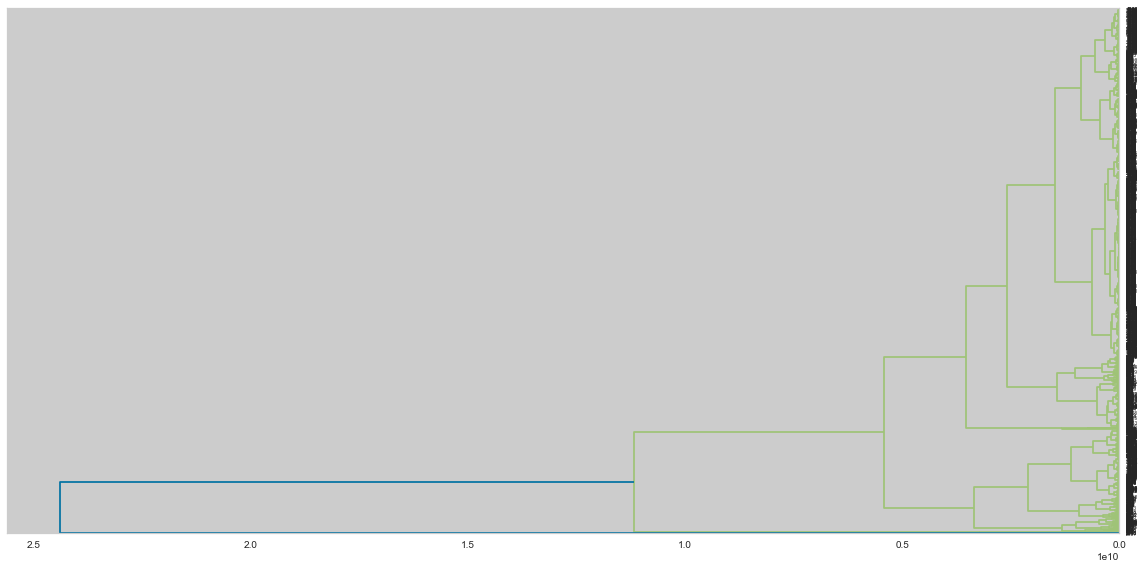

In [223]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

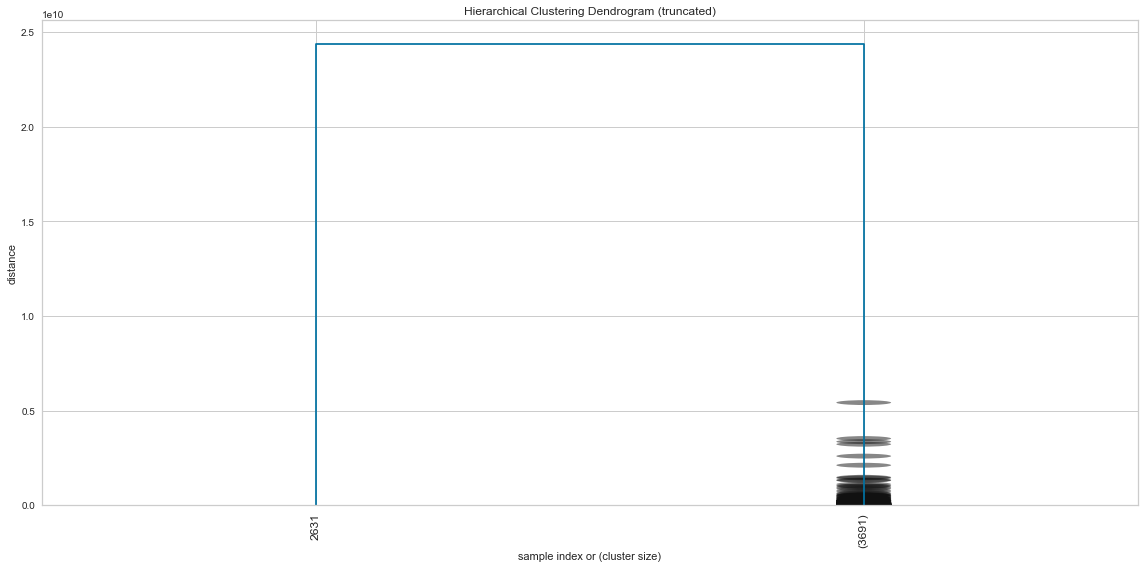

In [224]:
# Visualize dendrogram
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=2,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

In [225]:
# profile
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [226]:
df2 = df.join(df1)
df2.head()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,0
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,0


In [227]:
df2.groupby('cluster').mean()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes,profit,returnoninvestment
cluster,,,,,,,,,,,,,,,,,,
0,166.58006,110.267678,812.091303,758.595232,7733.318071,5.233135e+07,105231.342455,11459.905175,1.374424,334.804931,4.290656e+07,2002.95638,1997.47521,6.465646,2.110409,9239.904633,9.424794e+06,540.408191
1,363.00000,110.000000,584.000000,74.000000,629.000000,2.201412e+06,68883.000000,1173.000000,0.000000,279.000000,1.221550e+10,2006.00000,398.00000,7.000000,1.850000,7000.000000,-1.221330e+10,-99.981979


In [228]:
df2.groupby('cluster').size()

cluster
0    3691
1       1
dtype: int64

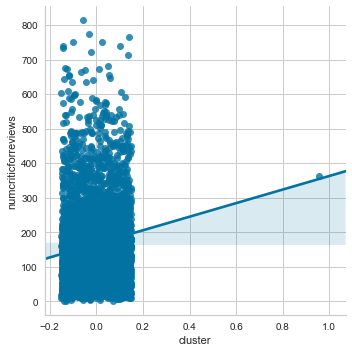

In [229]:
sns.lmplot("cluster", "numcriticforreviews", df2, x_jitter=.15, y_jitter=.15)

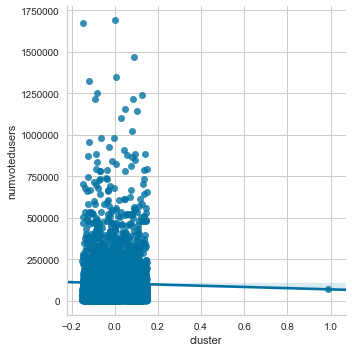

In [230]:
sns.lmplot("cluster", "numvotedusers", df2, x_jitter=.15, y_jitter=.15)

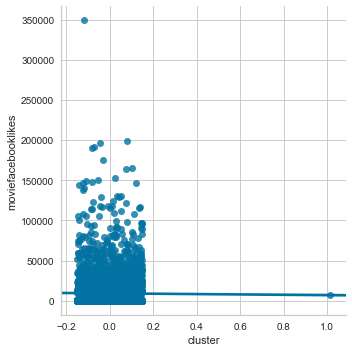

In [231]:
sns.lmplot("cluster", "moviefacebooklikes", df2, x_jitter=.15, y_jitter=.15)

# 10. Storytelling

Throughout the analysis, I gave some insight as to what key factors might translate into a high imdb score. I conclude that popularity is a large factor in the imdb score; films with more reviews, more likes, more votes, etc. were more likely to have a higher imdb score. Why? I think it is obvious that the more traction a movie gains, the better the movie is. Thus, resulting in a better score. Additionally, movies that were filled with Crime and Drama were frequently at the top of the list. Critics and viewers enjoy movies with that kind of content more than they do of Comedy.

There was a correlation between budget, as well. The higher the budget, the higher the imdb score. A film with more put into it will get more out of it in the end (as far as imdb score). In looking at financials, films with higher budgets also experienced a lower profit and return on investment.

However, once I got into model building, I found that the most significant factors were numcriticforreviews, numvotedusers, and moviefacebooklikes. 

My decision tree showed numvotedusers as the most important factor for a high imdb score. 

Most of the models had a difficult time accurately classifying "poor" movies, but that was in part due to the bins that I created. 

# 7. References

http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html#data-visualization
    
https://stackoverflow.com